In [1]:
# Importing the packages
import pandas as pd
import numpy as np

# Importing visualization packages
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
acq=pd.read_csv(r"C:\Users\Joyal\Desktop\Data Analytics\Python\Case study\Completed\Case study 2-credit card\Customer Acqusition.csv")

In [3]:
rpt=pd.read_csv(r"C:\Users\Joyal\Desktop\Data Analytics\Python\Case study\Completed\Case study 2-credit card\Repayment.csv")

In [4]:
spnd=pd.read_csv(r"C:\Users\Joyal\Desktop\Data Analytics\Python\Case study\Completed\Case study 2-credit card\spend.csv")

In [5]:
acq.head()

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary


In [6]:
rpt.head()

,SL No:,Customer,Month,Amount,Unnamed: 4
0,NaN,A1,12-Jan-04,495414.75,NaN
1,2.0,A1,3-Jan-04,245899.02,NaN
2,3.0,A1,15-Jan-04,259490.06,NaN
3,4.0,A1,25-Jan-04,437555.12,NaN
4,5.0,A1,17-Jan-05,165972.88,NaN


In [7]:
# Drop the 'Unnamed: 4' column
rpt = rpt.drop(columns=['Unnamed: 4'])


In [8]:
spnd.head()

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46
3,4,A1,25-Jan-04,FOOD,484342.47
4,5,A1,17-Jan-05,CAMERA,369694.07


In [9]:
merged_df = pd.merge(acq, rpt, left_on='Customer', right_on='Customer', how='outer')

In [10]:
merged_df.head(10)

,No,Customer,Age,City,Product,Limit,Company,Segment,SL No:,Month,Amount
0,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,NaN,12-Jan-04,495414.75
1,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2.0,3-Jan-04,245899.02
2,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3.0,15-Jan-04,259490.06
3,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4.0,25-Jan-04,437555.12
4,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5.0,17-Jan-05,165972.88
5,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,6.0,23-Feb-05,365366.62
6,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,7.0,1-Feb-05,14473.41
7,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,103.0,12-Jan-04,350446.82
8,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,117.0,5-Feb-04,117964.43
9,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,131.0,19-Apr-06,79849.19


In [11]:
final_df = pd.merge(merged_df, spnd, left_on=['Customer','SL No:'], right_on=['Customer','Sl No:'], how='outer')

In [12]:
final_df.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,SL No:,Month_x,Amount_x,Sl No:,Month_y,Type,Amount_y
0,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,NaN,12-Jan-04,495414.75,NaN,NaN,NaN,NaN
1,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2.0,3-Jan-04,245899.02,2.0,3-Jan-04,PETRO,410556.13
2,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3.0,15-Jan-04,259490.06,3.0,15-Jan-04,CLOTHES,23740.46
3,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4.0,25-Jan-04,437555.12,4.0,25-Jan-04,FOOD,484342.47
4,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5.0,17-Jan-05,165972.88,5.0,17-Jan-05,CAMERA,369694.07


In [13]:
final_df.rename(columns={'Month_x': 'Repayment_Date', 'Amount_x': 'Repayment_amount', 'Month_y': 'spend_date', 'Amount_y': 'spend_amount'}, inplace=True)

In [14]:
final_df.isna().sum()

No                  24
Customer            23
Age                 24
City                24
Product             24
Limit               24
Company             24
Segment             24
SL No:              25
Repayment_Date      24
Repayment_amount    24
Sl No:              24
spend_date          24
Type                24
spend_amount        24
dtype: int64

In [15]:
# Drop rows with null values
final_df = final_df.dropna()


In [16]:
final_df.shape[0]

1499

## 1a. In case age is less than 18, replace it with mean of age values.


In [17]:

# Calculate the mean of age values less than 18
mean_age_under_18 = final_df['Age'][final_df['Age'] < 18].mean()

# Replace age values less than 18 with the calculated mean
final_df['Age'] = np.where(final_df['Age'] < 18, mean_age_under_18, final_df['Age'])



## b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit. 
## (customer’s limit provided in acquisition table is the per transaction limit on his card)

In [18]:
def replace_spend_amount(row):
    if row['spend_amount'] > row['Limit']:
        return 0.5 * row['Limit']
    else:
        return row['spend_amount']

# Apply the custom function to the 'spend_amount' column
final_df['spend_amount'] = final_df.apply(replace_spend_amount, axis=1)

In [19]:
filtered_df = final_df[final_df['spend_amount'] == (final_df['Limit'] / 2)]
print(filtered_df)

         No Customer   Age        City   Product     Limit Company  \
18      2.0       A2  71.0    CALCUTTA    Silver  100000.0      C2   
19      2.0       A2  71.0    CALCUTTA    Silver  100000.0      C2   
20      2.0       A2  71.0    CALCUTTA    Silver  100000.0      C2   
21      2.0       A2  71.0    CALCUTTA    Silver  100000.0      C2   
22      2.0       A2  71.0    CALCUTTA    Silver  100000.0      C2   
...     ...      ...   ...         ...       ...       ...     ...   
1486   87.0      A87  27.0    CALCUTTA    Silver  100003.0     C10   
1496   97.0      A97  58.0  TRIVANDRUM  Platimum   10000.0     C20   
1497   98.0      A98  51.0    CALCUTTA  Platimum   10001.0     C21   
1498   99.0      A99  35.0    CALCUTTA  Platimum   10002.0     C22   
1499  100.0     A100  36.0      COCHIN    Silver  100000.0      C5   

            Segment  SL No: Repayment_Date  Repayment_amount  Sl No:  \
18     Salaried_MNC   104.0       3-Jan-04         185955.07   104.0   
19     Salaried

## c. Incase the repayment amount is more than the limit, replace the repayment with the limit.


In [20]:

# Replace 'Repayment_amount' values that are greater than 'Limit' with 'Limit'
final_df['Repayment_amount'] = np.where(final_df['Repayment_amount'] > final_df['Limit'], final_df['Limit'], final_df['Repayment_amount'])


## 2. From the above dataset create the following summaries:
## a. How many distinct customers exist?

In [21]:
distinct_customers = final_df['Customer'].nunique()
print(f"Number of distinct customers: {distinct_customers}")

Number of distinct customers: 100


## b. How many distinct categories exist?


In [22]:

distinct_categories = final_df['Type'].nunique()
print(f"Number of distinct categories: {distinct_categories}")

Number of distinct categories: 15


## c. What is the average monthly spend by customers?


In [23]:

# Convert 'spend_date' to datetime format
final_df['spend_date'] = pd.to_datetime(final_df['spend_date'], format='%d-%b-%y')

# Extract month and year from 'spend_date'
final_df['spend_Year'] = final_df['spend_date'].dt.year.astype(int)
final_df['spend_Month'] = final_df['spend_date'].dt.month.astype(int)

# Group by 'Customer', 'Year' and 'Month', then sum 'spend_amount'
grouped_df = final_df.groupby(['Customer', 'spend_Year', 'spend_Month'])['spend_amount'].sum()

# Calculate the average of the sums
average_monthly_spend = grouped_df.mean()

print(f"Average monthly spend by customers: {average_monthly_spend}")

Average monthly spend by customers: 271741.77748451056


In [25]:
final_df.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,SL No:,Repayment_Date,Repayment_amount,Sl No:,spend_date,Type,spend_amount,spend_Year,spend_Month
1,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2.0,3-Jan-04,245899.02,2.0,2004-01-03,PETRO,410556.13,2004,1
2,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3.0,15-Jan-04,259490.06,3.0,2004-01-15,CLOTHES,23740.46,2004,1
3,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4.0,25-Jan-04,437555.12,4.0,2004-01-25,FOOD,484342.47,2004,1
4,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5.0,17-Jan-05,165972.88,5.0,2005-01-17,CAMERA,369694.07,2005,1
5,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,6.0,23-Feb-05,365366.62,6.0,2005-02-23,SANDALS,168285.60,2005,2


 ## d. What is the average monthly repayment by customers?


In [26]:

# Convert 'Repayment_Date' to datetime format
final_df['Repayment_Date'] = pd.to_datetime(final_df['Repayment_Date'], format='%d-%b-%y')

# Extract month and year from 'Repayment_Date'
final_df['repay_Year'] = final_df['Repayment_Date'].dt.year.astype(int)
final_df['repay_Month'] = final_df['Repayment_Date'].dt.month.astype(int)

# Group by 'Customer', 'Year' and 'Month', then sum 'Repayment_amount'
grouped_df = final_df.groupby(['Customer', 'repay_Year', 'repay_Month'])['Repayment_amount'].sum()

# Calculate the average of the sums
average_monthly_repayment = grouped_df.mean()

print(f"Average monthly repayment by customers: {average_monthly_repayment}")


Average monthly repayment by customers: 306374.6182205514


 ## e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month? 


In [27]:
# Group by 'Customer', 'Year' and 'Month', then sum 'Repayment_amount' and 'spend_amount'
repayment_df = final_df.groupby(['Customer', 'repay_Year', 'repay_Month'])['Repayment_amount'].sum().reset_index()
spend_df = final_df.groupby(['Customer', 'spend_Year', 'spend_Month'])['spend_amount'].sum().reset_index()

# Merge the two dataframes on 'Customer', 'Year' and 'Month'
merged_df = pd.merge(repayment_df, spend_df, left_on=['Customer', 'repay_Year', 'repay_Month'], right_on=['Customer', 'spend_Year', 'spend_Month'], how='outer')

# Fill NaN values with 0
merged_df.fillna(0, inplace=True)

# Calculate monthly profit for each customer
merged_df['Monthly_Profit'] = merged_df['Repayment_amount'] - merged_df['spend_amount']

# Apply interest rate to positive profits
interest_rate = 2.9 / 100
merged_df['Interest_Earned'] = merged_df['Monthly_Profit'].apply(lambda x: x * interest_rate if x > 0 else 0)

# Group by 'Year' and 'Month', then sum 'Interest_Earned'
monthly_profit = merged_df.groupby(['repay_Year', 'repay_Month'])['Interest_Earned'].sum()

print(f"Monthly profit for the bank: \n{monthly_profit}")


Monthly profit for the bank: 
repay_Year  repay_Month
0.0         0.0                 0.00000
2004.0      1.0            276433.00482
            2.0             76675.24977
            3.0             60566.84249
            4.0            118384.99596
            5.0            100967.86189
            9.0             33494.37766
            11.0            35539.36747
2005.0      1.0            110033.81550
            2.0            235134.81010
            4.0             69967.10201
            5.0            363077.02750
            6.0             24131.09894
            7.0             42109.31486
            8.0            123799.14400
            9.0             19961.01378
            10.0            30866.40404
            11.0           138106.48250
            12.0            37485.09840
2006.0      1.0             41298.92436
            2.0            134907.32488
            3.0            286077.23235
            4.0            256314.97808
            5.0           

# f. What are the top 5 product types?

In [29]:
top_product_types = final_df['Type'].value_counts().head(5)

print(top_product_types)

Type
PETRO           200
FOOD            160
CAMERA          160
AIR TICKET      147
TRAIN TICKET    132
Name: count, dtype: int64


## g. Which city is having maximum spend?


In [25]:

city_max_spend = final_df.groupby('City')['spend_amount'].sum().idxmax()
print(city_max_spend)


COCHIN


## h. WHich age Group is spending more money


In [30]:

# Define the age groups
bins = [0, 20, 30, 40, 50, 60, 70, 120]
labels = ['<20', '20-29', '30-39', '40-49', '50-59', '60-69', '70+']

# Create a new column 'age_group' in the dataframe
final_df['age_group'] = pd.cut(final_df['Age'], bins=bins, labels=labels, right=False)

# Group by 'age_group' and calculate the sum of 'spend_amount'
age_group_spend = final_df.groupby('age_group', observed=True)['spend_amount'].sum()

# Get the age group with maximum spend
max_spend_age_group = age_group_spend.idxmax()

print(f"The age group that spends the most is {max_spend_age_group}")


The age group that spends the most is 20-29


## i. Who are the top 10 customers in terms of repayment?


In [31]:

# Group by 'Customer' and calculate the sum of 'Repayment_amount'
customer_repayment = final_df.groupby('Customer')['Repayment_amount'].sum()

# Sort the customers by repayment amount in descending order and get the top 10
top_10_customers = customer_repayment.sort_values(ascending=False).head(10)

print(top_10_customers)


Customer
A61    10539142.91
A60     9876290.74
A13     9572000.66
A43     8489871.46
A45     8448334.87
A12     8334760.16
A14     7943268.63
A44     7744730.12
A39     7622483.30
A42     7615460.86
Name: Repayment_amount, dtype: float64


## 3.Calculate the city wise spend on each product on yearly basis. Also include a graphical 
## representation for the same.

In [32]:
# Group by 'City', 'Product', and 'Year' and calculate the sum of 'spend_amount'
city_product_yearly_spend = final_df.groupby(['City', 'Product', 'spend_Year'])['spend_amount'].sum()

print(city_product_yearly_spend)


City        Product   spend_Year
BANGALORE   Gold      2004           8804407.74
                      2005          12892362.99
                      2006          12030611.09
            Platimum  2004           1112732.30
                      2005            912284.97
                                       ...     
TRIVANDRUM  Platimum  2005           3601443.30
                      2006           2147403.75
            Silver    2004            209667.48
                      2005            269912.99
                      2006            555862.12
Name: spend_amount, Length: 72, dtype: float64


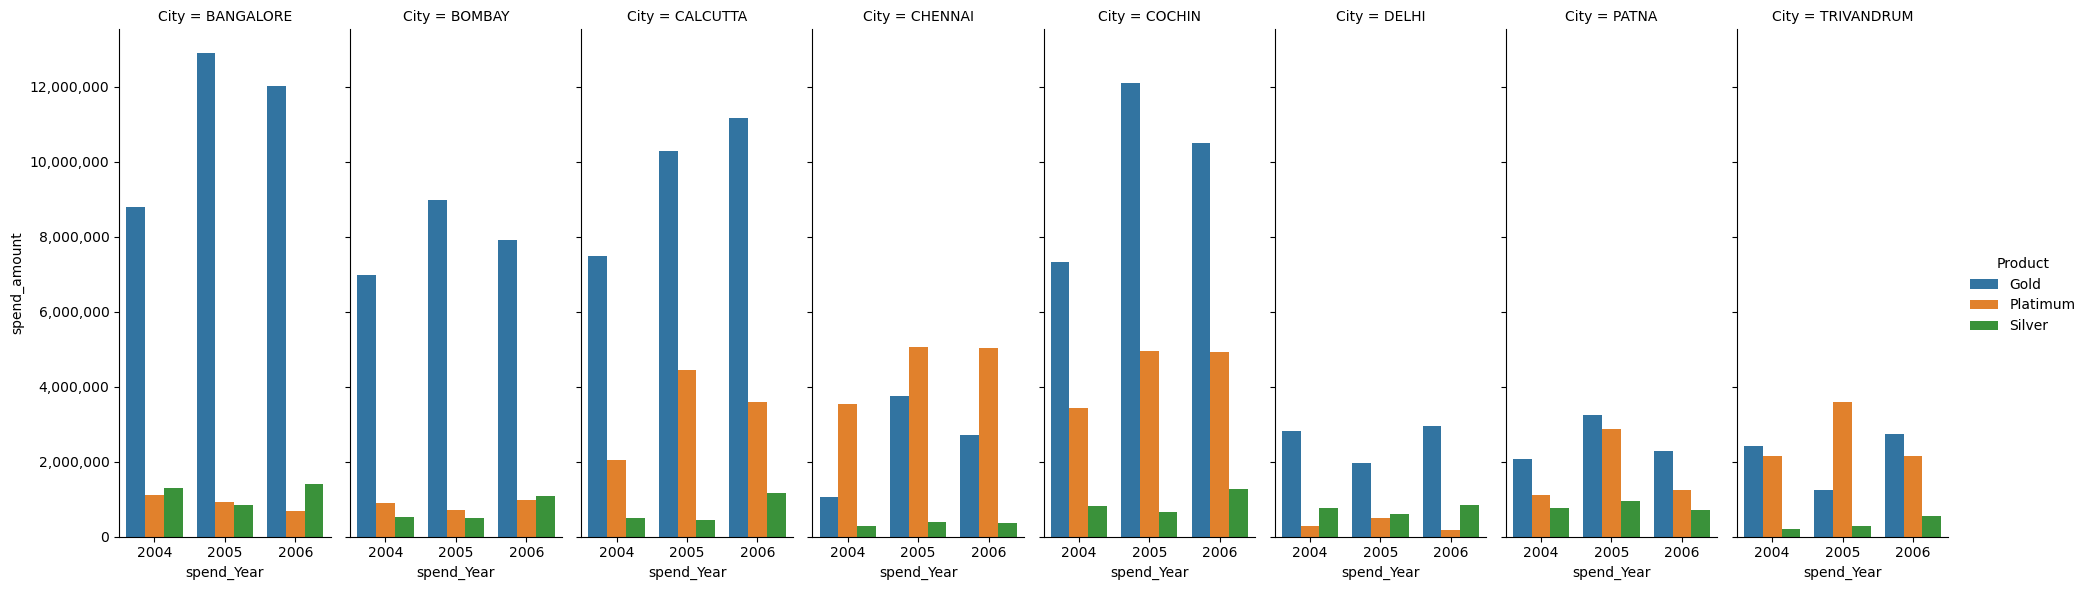

In [34]:
import matplotlib.ticker as ticker

# Reset the index of the grouped data
data = city_product_yearly_spend.reset_index()

# Create a catplot
g = sns.catplot(x='spend_Year', y='spend_amount', hue='Product', col='City', data=data, kind='bar', errorbar=None, height=6, aspect=.4)

# Format y-axis labels as large numbers
formatter = ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x))
g.fig.get_axes()[0].yaxis.set_major_formatter(formatter)

plt.show()


## 4. Create graphs for
##  a. Monthly comparison of total spends, city wise

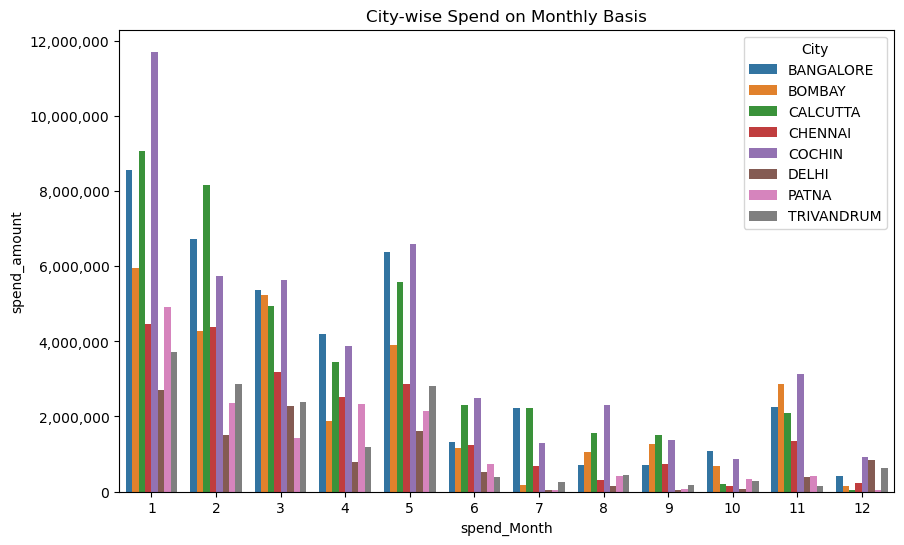

In [35]:
import matplotlib.ticker as ticker

# Group by 'City' and 'Month' and calculate the sum of 'spend_amount'
city_monthly_spend = final_df.groupby(['City', 'spend_Month'])['spend_amount'].sum().reset_index()

# Create a barplot
plt.figure(figsize=(10,6))
sns.barplot(x='spend_Month', y='spend_amount', hue='City', data=city_monthly_spend, errorbar=None)

# Format y-axis labels as large numbers
formatter = ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x))
plt.gca().yaxis.set_major_formatter(formatter)

plt.title('City-wise Spend on Monthly Basis')
plt.show()


##  b. Comparison of yearly spend on air tickets


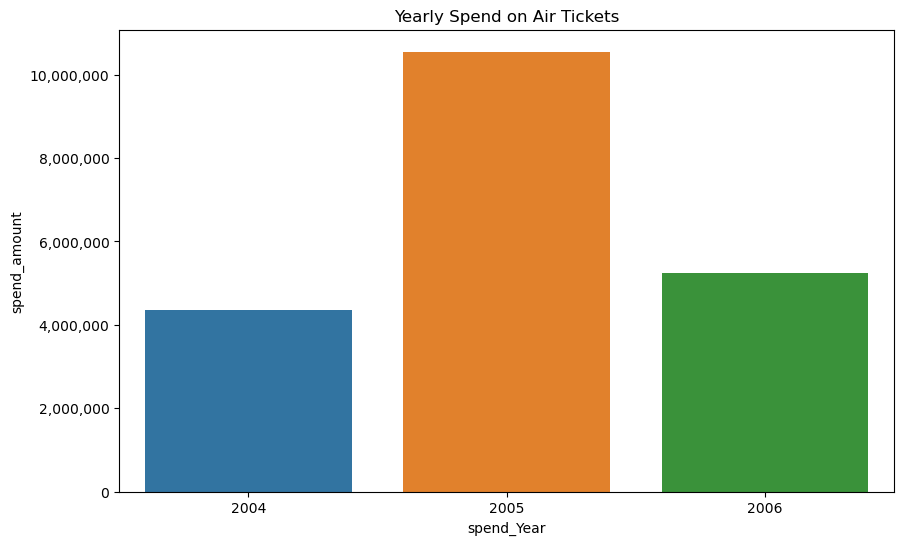

In [36]:
import matplotlib.ticker as ticker

# Filter for rows where 'Type' is 'AIR TICKET'
air_tickets = final_df[final_df['Type'] == 'AIR TICKET']

# Group by 'Year' and calculate the sum of 'spend_amount'
yearly_air_ticket_spend = air_tickets.groupby('spend_Year')['spend_amount'].sum().reset_index()

# Create a barplot
plt.figure(figsize=(10,6))
sns.barplot(x='spend_Year', y='spend_amount', data=yearly_air_ticket_spend, errorbar=None)

# Format x-axis labels as integers
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

# Format y-axis labels as large numbers
formatter = ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x))
plt.gca().yaxis.set_major_formatter(formatter)

plt.title('Yearly Spend on Air Tickets')
plt.show()


## c. Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)

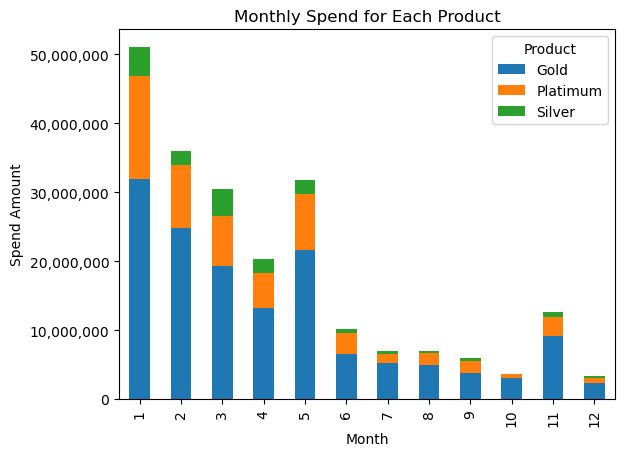

In [37]:
# Group by 'Product' and 'Month', and calculate the sum of 'spend_amount'
grouped_df = final_df.groupby(['spend_Month', 'Product'])['spend_amount'].sum().reset_index()

# Pivot the DataFrame to get 'Product' as columns and 'Month' as index
pivot_df = grouped_df.pivot(index='spend_Month', columns='Product', values='spend_amount')

# Plot the DataFrame
ax = pivot_df.plot(kind='bar', stacked=True)

# Format y-axis as large values
fmt = '{x:,.0f}'
tick = ticker.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 

plt.title('Monthly Spend for Each Product')
plt.xlabel('Month')
plt.ylabel('Spend Amount')
plt.legend(title='Product')
plt.show()


#5. Write user defined PYTHON function to perform the following analysis:
#You need to find top 10 customers for each city in terms of their repayment amount by 
#different products and by different time periods i.e. year or month. The user should be able 
#to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the 
#function should automatically take these inputs while identifying the top 10 customers.

In [38]:
def top_customers(df, product, time_period):
    # Filter the DataFrame based on the product
    df_product = df.loc[df['Product'] == product].copy()

    # Extract the year and month from the 'Repayment_Date' column
    df_product['Year'] = pd.to_datetime(df_product['Repayment_Date']).dt.year
    df_product['Month'] = pd.to_datetime(df_product['Repayment_Date']).dt.month

    # Group by 'City', 'Customer', and the time period, and calculate the sum of 'Repayment_amount'
    if time_period == 'yearly':
        grouped_df = df_product.groupby(['City', 'Customer', 'Year'])['Repayment_amount'].sum().reset_index()
    elif time_period == 'monthly':
        grouped_df = df_product.groupby(['City', 'Customer', 'Year', 'Month'])['Repayment_amount'].sum().reset_index()

    # Sort the DataFrame based on 'Repayment_amount' in descending order within each city
    top_customers_df = grouped_df.groupby('City', group_keys=False).apply(lambda x: x.sort_values('Repayment_amount', ascending=False)).reset_index(drop=True)

    # Get the top 10 customers for each city
    top_customers_df = top_customers_df.groupby('City').head(10)

    return top_customers_df



In [39]:
top_customers_df = top_customers(final_df, 'Gold', 'yearly')
print(top_customers_df)

          City Customer  Year  Repayment_amount
0    BANGALORE      A43  2005        4006956.60
1    BANGALORE      A13  2005        3757673.00
2    BANGALORE      A13  2006        3477314.89
3    BANGALORE      A14  2004        2770261.30
4    BANGALORE      A14  2006        2681025.72
5    BANGALORE      A30  2005        2667746.38
6    BANGALORE      A43  2006        2576417.39
7    BANGALORE      A14  2005        2491981.61
8    BANGALORE      A30  2006        2486958.41
9    BANGALORE      A13  2004        2337012.77
20      BOMBAY      A17  2006        3127783.14
21      BOMBAY      A42  2005        3125758.43
22      BOMBAY      A12  2006        3118090.96
23      BOMBAY      A42  2004        3045914.71
24      BOMBAY      A12  2005        2877588.30
25      BOMBAY      A12  2004        2339080.90
26      BOMBAY      A62  2004        1744114.25
27      BOMBAY      A62  2006        1684085.69
28      BOMBAY      A62  2005        1541617.21
29      BOMBAY      A42  2006        144